<a href="https://colab.research.google.com/github/mnijhuis-dnb/Artificial_Intelligence_and_Machine_Learning_for_SupTech/blob/main/Tutorials/Tutorial%206%20Finding%20clusters%20and%20neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Artificial Intelligence and Machine Learning for SupTech  
Tutorial 6: Finding clusters and neighbours

*	Implementing K-means and DBSCAN
*	Hierarchical clustering: Bottom-up or Top-down?
*	Visual inspection of results

<br/>

14 March 2023  

**Instructors**  
Prof. Iman van Lelyveld (iman.van.lelyveld@vu.nl)<br/>
Dr. Michiel Nijhuis (m.nijhuis@dnb.nl)  

In [1]:
!gdown 1PCu4jNahysRpZ72z31KHpVkyAOp6nrKj

'gdown' is not recognized as an internal or external command,
operable program or batch file.


Tooday is about applying machine learning methods to examine stock returns in various ways. This involves data processing, standardization, normalization, model fitting etc. Importantly, we

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/company_data.csv', index_col=0)

In [ ]:
df = df.fillna(-1)

In [ ]:
df

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(
    n_clusters=n_clusters, 
    random_state=0,
).fit(df_X)

In [ ]:
sr_clusters = pd.Series(kmeans.labels_, index=df_X.index, name='clusters')
sr_clusters

permno
10080    0
10087    0
10100    0
10149    1
10200    2
        ..
86574    1
86685    1
86727    0
86729    2
86739    2
Name: clusters, Length: 635, dtype: int32

In [ ]:
sr_clusters.value_counts()

1    323
2    161
0    151
Name: clusters, dtype: int64

In [ ]:
df_X.join(sr_clusters).groupby('clusters').mean()

,aeavol,rd
clusters,,
0,1.180454,0.019629
1,0.575519,0.025682
2,0.921984,0.639050


In [ ]:
df_X_clusters = df_X.join(sr_clusters).groupby('clusters')
centroids = df_X_clusters.mean().values

In [ ]:
# store for comparison
sr_clusters_km = sr_clusters.copy()

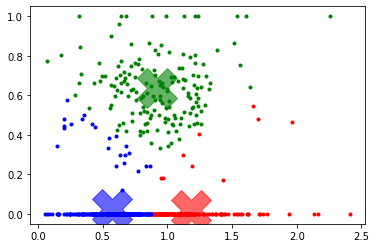

In [ ]:
for permno, (x1, x2) in df_X.iterrows():
  cluster = sr_clusters[permno]
  color = colors[cluster]
  plt.plot(
    x1, x2,
    color=color,
    marker='o', markersize=3, lw=0
  )
for i, (x1, x2) in enumerate(centroids):
  plt.plot(x1, x2, color=colors[i], marker='X', markersize=40, alpha=.6)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg = AgglomerativeClustering(
    n_clusters=n_clusters
).fit(df_X)

sr_clusters = pd.Series(agg.labels_, index=df_X.index, name='clusters')
df_X_clusters = df_X.join(sr_clusters).groupby('clusters')
centers = df_X_clusters.mean().values

In [ ]:
# store for comparison
sr_clusters_agg = sr_clusters.copy()

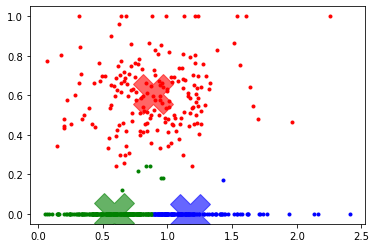

In [ ]:
for permno, (x1, x2) in df_X.iterrows():
  cluster = sr_clusters[permno]
  color = colors[cluster]
  plt.plot(
    x1, x2,
    color=color,
    marker='o', markersize=3, lw=0
  )
for i, (x1, x2) in enumerate(centers):
  plt.plot(x1, x2, color=colors[i], marker='X', markersize=40, alpha=.6)

## How to evaluate clustering performance?

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:

help(silhouette_score)

Help on function silhouette_score in module sklearn.metrics.cluster._unsupervised:

silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)
    Compute the mean Silhouette Coefficient of all samples.
    
    The Silhouette Coefficient is calculated using the mean intra-cluster
    distance (``a``) and the mean nearest-cluster distance (``b``) for each
    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
    b)``.  To clarify, ``b`` is the distance between a sample and the nearest
    cluster that the sample is not a part of.
    Note that Silhouette Coefficient is only defined if number of labels
    is ``2 <= n_labels <= n_samples - 1``.
    
    This function returns the mean Silhouette Coefficient over all samples.
    To obtain the values for each sample, use :func:`silhouette_samples`.
    
    The best value is 1 and the worst value is -1. Values near 0 indicate
    overlapping clusters. Negative values generally indi

## KMeans silhouette

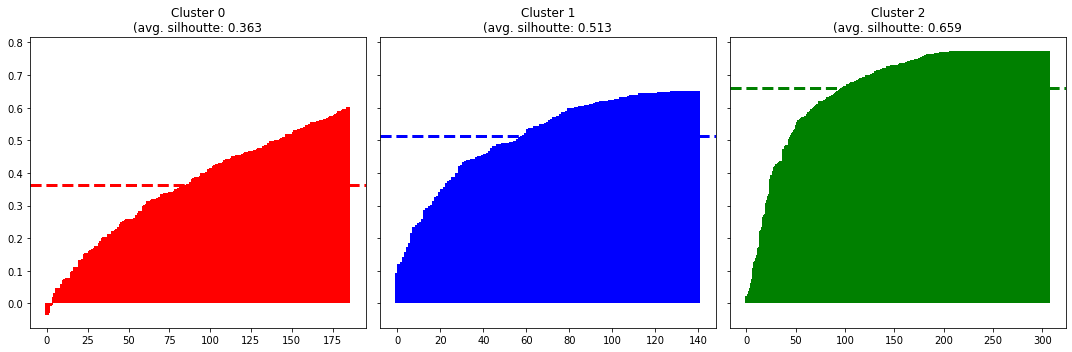

In [ ]:
fig, axes = plt.subplots(1, n_clusters, sharey=True, figsize=[15,5])

silhouette_values = silhouette_samples(df_X, sr_clusters_km)

for cluster in sr_clusters.unique():
  ax = axes[cluster]
  color = colors[cluster]
  sils = silhouette_values[sr_clusters == cluster]
  sils = sorted(sils)
  ax.bar(range(len(sils)), sils, color=color, width=2)

  sils_avg = np.mean(sils)
  ax.axhline(sils_avg, lw=3, ls='--', color=color)
  ax.set_title(f'Cluster {cluster}\n(avg. silhoutte: {sils_avg:.3f}')

fig.tight_layout()

## Agglomerative clustering

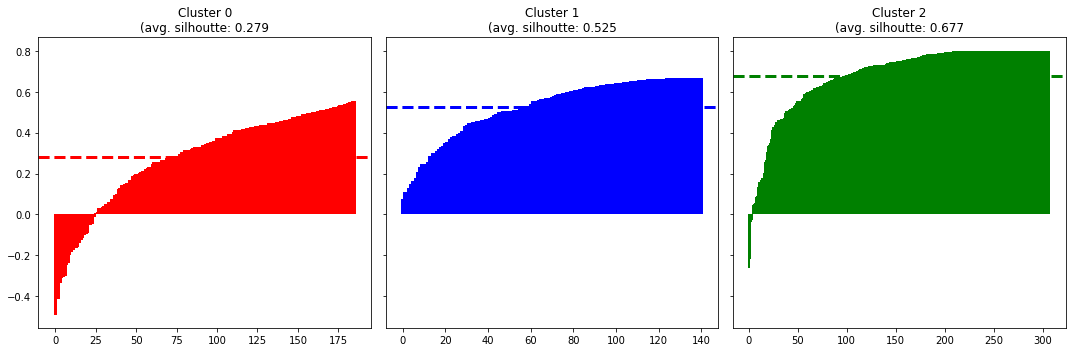

In [ ]:
fig, axes = plt.subplots(1, n_clusters, sharey=True, figsize=[15,5])

silhouette_values = silhouette_samples(df_X, sr_clusters_agg)

for cluster in sr_clusters.unique():
  ax = axes[cluster]
  color = colors[cluster]
  sils = silhouette_values[sr_clusters == cluster]
  sils = sorted(sils)
  ax.bar(range(len(sils)), sils, color=color, width=2)

  sils_avg = np.mean(sils)
  ax.axhline(sils_avg, lw=3, ls='--', color=color)
  ax.set_title(f'Cluster {cluster}\n(avg. silhoutte: {sils_avg:.3f}')

fig.tight_layout()